In [1]:
import pandas as pd
from yahoo_fin.stock_info import get_data
import matplotlib.pyplot as plt

/Users/jasonmaytin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# List of tickers for the 30 companies
# custom_tickers = [
#     "AMZN", "AXP", "AMGN", "AAPL", "BA",
#     "CAT", "CSCO", "CVX", "GS", "HD",
#     "HON", "IBM", "INTC", "JNJ", "KO",
#     "JPM", "MCD", "MMM", "MRK", "MSFT",
#     "NKE", "PG", "TRV", "UNH", "CRM",
#     "VZ", "V", "WMT", "DIS", "DJI"
# ]

#PAST DJIA
custom_tickers = [
    "PG", "JNJ", "XOM", "CVX", "MRK", "PFE", "MCD", "T",
    "VZ", "HPQ", "IBM", "MSFT", "INTC", "HD", "WMT", "TRV",
    "RTX", "BA", "AA", "DD", "CAT", "MMM", "DIS", "JPM", "AXP", "GE",
    "CCEP",
    #"CRJ", "H", "BOA"
]

# custom_tickers = [
#     "ATVI", "ADBE", "AKAM", "ALTR", "AMZN", "AMGN", "APOL", "AAPL", "AMAT", "ADSK",
#     "ADP", "BBBY", "BIIB", "AVGO", "CDNS", "CELG", "CERN", "CTAS", "CSCO", "CTXS",
#     "CTSH", "CMCSA", "COST", "DELL", "XRAY", "EBAY", "EA", "EXPE", "EXPD", "ESRX",
#     "FAST", "FISV", "FLEX", "FLIR", "GRMN", "GILD", "GOOGL", "MNST", "HAR", "HSIC",
#     "INFY", "INTC", "INTU", "KLAC", "LRCX", "LLTC", "MRVL", "MXIM", "AZN", "MLNX",
#     "SIEGY", "MSFT", "TIGO", "MNST", "MYL", "NIHD", "NVDA", "ORLY", "ORCL", "PCAR",
#     "PAYX", "QCOM", "BB", "ROST", "RYAAY", "WDC", "SANM", "STX", "SHLD", "MRK",
#     "SIRI", "SPLS", "SBUX", "STLD", "SYMC", "TEVA", "TXN", "HD", "URBN", "VRSN",
#     "VRSK", "VRTX", "LBTYA", "VOD", "WFM", "WYNN", "XLNX", "YHOO"
# ]



custom_tickers = [
    "AAPL", "MSFT", "AMZN", "INTC", "ORCL", "CSCO",
    "AMGN", "GILD", "BIIB", "EBAY", "NFLX",
    "ADBE", "NVDA", "ISRG", "MNST", "REGN", "ILMN", 
    "MDLZ", "ORLY", "MAR", "ROST", "ADI", "ADP", "CTSH", "EA", "FAST", "INCY", "INTU",
    "JBHT", "MAT", "MCHP", "NTAP", "PCAR", "TXN", 
    "SIRI", "VRTX", "LRCX", "KLAC", "CSX", "VOD", "PAYX", 
    "REGN", "SHPG", "SRCL", "TSCO", "VRSN", "WBA", "XRAY"
]

# Fetch data for each ticker
stock_data = {}
for ticker in custom_tickers:
    try:
        data = get_data(ticker)
        stock_data[ticker] = data
    except AssertionError as e:
        print(f"No data found for {ticker}: {e}")

# Print the first few rows of the data for each ticker
for ticker in custom_tickers:
    if ticker in stock_data:
        print(f"Stock data for {ticker}:")
        print(stock_data[ticker].head())
        print("\n")

Stock data for AAPL:
                open      high       low     close  adjclose     volume ticker
1980-12-12  0.128348  0.128906  0.128348  0.128348  0.099192  469033600   AAPL
1980-12-15  0.122210  0.122210  0.121652  0.121652  0.094017  175884800   AAPL
1980-12-16  0.113281  0.113281  0.112723  0.112723  0.087117  105728000   AAPL
1980-12-17  0.115513  0.116071  0.115513  0.115513  0.089273   86441600   AAPL
1980-12-18  0.118862  0.119420  0.118862  0.118862  0.091861   73449600   AAPL


Stock data for MSFT:
                open      high       low     close  adjclose      volume  \
1986-03-13  0.088542  0.101563  0.088542  0.097222  0.060163  1031788800   
1986-03-14  0.097222  0.102431  0.097222  0.100694  0.062311   308160000   
1986-03-17  0.100694  0.103299  0.100694  0.102431  0.063386   133171200   
1986-03-18  0.102431  0.103299  0.098958  0.099826  0.061774    67766400   
1986-03-19  0.099826  0.100694  0.097222  0.098090  0.060700    47894400   

           ticker  
1986-

In [3]:
def calculate_weekly_returns(df):
    weekly_df = df.resample('W').last()
    weekly_df['close'].fillna(method='ffill', inplace=True)
    weekly_df['returns'] = weekly_df['close'].pct_change().fillna(0)
    return weekly_df

weekly_returns_dict = {}

for ticker, data in stock_data.items():
    data = data.loc['2001-01-02':'2013-05-14']
    data.index = pd.to_datetime(data.index)
    weekly_returns = calculate_weekly_returns(data)
    weekly_returns_dict[ticker] = weekly_returns

#for i in custom_tickers:
    #print(i)
    #plt.plot(weekly_returns_dict[i].index,weekly_returns_dict[i]["close"])
    #plt.show()

In [4]:
study_periods = [
    ('2001-01-02', '2004-01-06'),
    ('2004-01-06', '2007-01-02'),
    ('2007-01-02', '2010-01-05'),
    ('2010-01-05', '2013-05-14')
]

weekly_returns_dict = {}

for ticker, data in stock_data.items():
    data.index = pd.to_datetime(data.index)
    
    for period_num, (start_date, end_date) in enumerate(study_periods, start=1):
        period_data = data.loc[start_date:end_date]
        period_returns = calculate_weekly_returns(period_data)
        weekly_returns_dict.setdefault(ticker, {})[f'period_{period_num}'] = period_returns

In [5]:
period_dfs = {}

# Iterate over the periods
for period in ['period_1', 'period_2', 'period_3', 'period_4']:
    # Initialize an empty dictionary to store data for the current period
    period_data = {}
    
    # Iterate over each ticker's data
    for ticker, data in weekly_returns_dict.items():
        # Drop NaN values from the 'close' column for the current period
        close_prices = data[period][['returns']].dropna()
        period_data[ticker] = close_prices
    
    # Concatenate the data for all tickers into a single DataFrame for the current period
    period_df = pd.concat(period_data, axis=1)
    period_dfs[period] = period_df.dropna(axis=1)

correlation_matrices = {}

# Iterate over the periods
for period, period_df in period_dfs.items():
    # Calculate correlation matrix for the current period and store it in the dictionary
    correlation_matrices[period] = period_df.corr()


<ipython-input-6-f2f2877dcc6b>:25: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward') #'ward'
/Users/jasonmaytin/opt/anaconda3/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:446: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


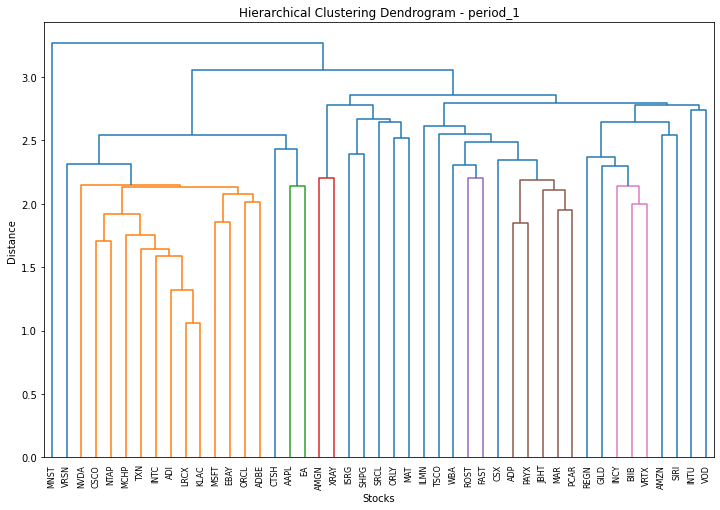

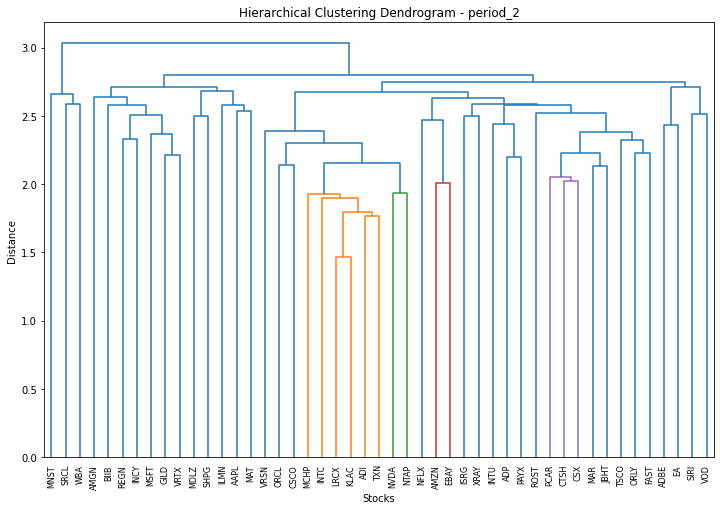

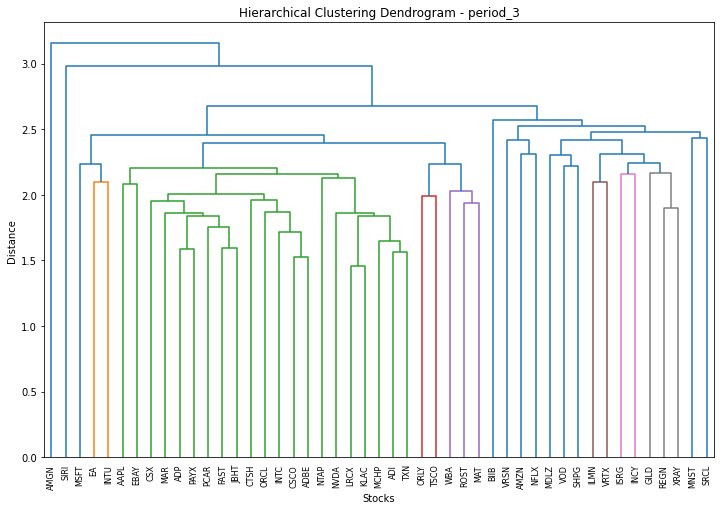

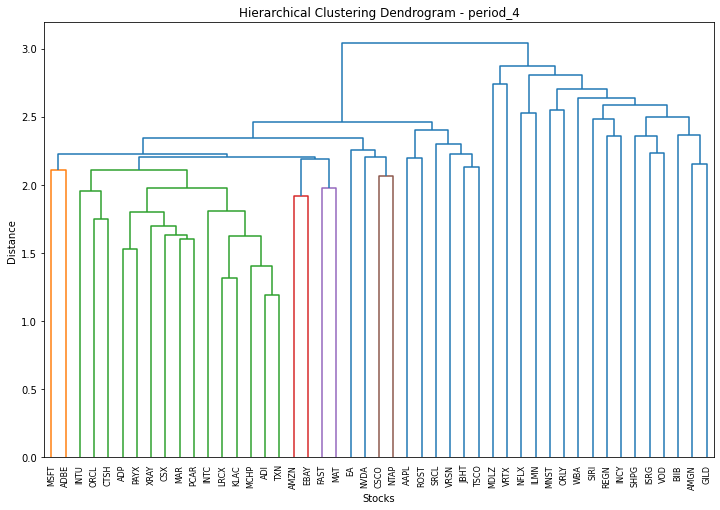

In [6]:
import numpy as np
from scipy.cluster.hierarchy import average, fcluster, linkage
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def ultrametric(correlation_matrix, q=2):
    """
    Convert a correlation matrix to an ultrametric distance matrix.

    Parameters:
        correlation_matrix (pd.DataFrame): Correlation matrix of stocks.
        q (float): Exponent parameter (default is 2).

    Returns:
        pd.DataFrame: Ultrametric distance matrix.
    """
    # Calculate the ultrametric distance matrix
    ultrametric_distances = q * (1 - correlation_matrix) ** (1/q)
    
    return ultrametric_distances

# Function to perform hierarchical clustering and print stocks in each cluster
def hierarchical_clustering(distance_matrix, labels, period):
#    linkage_matrix = average(distance_matrix)
    linkage_matrix = linkage(distance_matrix, method='ward') #'ward'
    labels = [label[0] for label in labels]

    # Set the figure size to be larger
    plt.figure(figsize=(12, 8))  # Adjust the size as needed

    # Plot the dendrogram
    dendrogram(average(distance_matrix), labels=labels, orientation='top')

    # Customize plot title and axis labels
    plt.title(f'Hierarchical Clustering Dendrogram - {period}')
    plt.xlabel('Stocks')
    plt.ylabel('Distance')

    # Create dictionary to store stocks in each cluster for 2, 4, and 8 clusters
    cluster_stocks = {num_clusters: {} for num_clusters in [2, 4, 8]}
    
    # Perform clustering to get cluster labels for 2, 4, and 8 clusters
    for num_clusters in [2, 4, 8]:
        cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
        
        # Assign stocks to clusters
        for stock, cluster_label in zip(labels, cluster_labels):
            if cluster_label not in cluster_stocks[num_clusters]:
                cluster_stocks[num_clusters][cluster_label] = [stock]
            else:
                cluster_stocks[num_clusters][cluster_label].append(stock)

    # Show the plot
    plt.show()
    
    return cluster_stocks

# Convert new correlation matrices to distance matrices using ultrametric function
distance_matrices = {}
for period, correlation_matrix in correlation_matrices.items():
    distance_matrices[period] = ultrametric(correlation_matrix)

# Create a dictionary to store cluster stocks for each period
all_cluster_stocks = {}

# Perform hierarchical clustering and plot dendrogram for each study period
for period, distance_matrix in distance_matrices.items():
    all_cluster_stocks[period] = hierarchical_clustering(distance_matrix.values, distance_matrix.index, period)


In [7]:
def calculate_metrics_for_random_selection(period_dfs, num_stocks_list):
    results_by_period = {}
    num_portfolios = 100
 
    for period, returns_data in period_dfs.items():
        returns_data = returns_data.droplevel(1, axis=1)
        #print(returns_data)
        results_by_stocks = {}
        stocks_length_list = {}
        #print(returns_data)
        
        for num_stocks in num_stocks_list:
            std_returns = []
            portfolio_returns = []
            correlations = []
            selected_stocks_list = {}
            
            for _ in range(num_portfolios):
                selected_stocks = np.random.choice(returns_data.columns, size=num_stocks, replace=False)
                
                try:
                    selected_stocks_list[num_stocks] = np.concatenate([selected_stocks_list[num_stocks], selected_stocks])
                except KeyError:
                    selected_stocks_list[num_stocks] = selected_stocks
               
                
                portfolio_return_stocks = returns_data[selected_stocks].mean(axis=1)
                mean_portfolio_return = np.prod(1+portfolio_return_stocks)-1
                portfolio_returns.append(mean_portfolio_return)
                
                
                mean_std = (portfolio_return_stocks).std()
                std_returns.append(mean_std)
                
                correlation_matrix = returns_data[selected_stocks].corr()
                upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
                upper_triangle_flat = upper_triangle.stack().dropna().tolist()
                mean_correlation = np.mean(upper_triangle_flat)
                correlations.append(mean_correlation)
            
            #stocks_length_list[period] = selected_stocks_list
            
            sharpe_ratio = np.mean((np.array(portfolio_returns)/10) / np.array(std_returns))
            mean_return = np.mean(portfolio_returns)
            mean_std = np.mean(std_returns)
            mean_correl = np.mean(correlations)
            final_stocks_list = [list(i) for i in selected_stocks_list.values()]
            
            results_by_stocks[num_stocks] = {'Mean': mean_return, 'SD': mean_std, 'Sharpe': sharpe_ratio, 'Correlation': mean_correl, "Stocks" : final_stocks_list}

        results_by_period[period] = results_by_stocks
    
    return results_by_period

num_stocks_list = [2, 4, 8]

results_by_period = calculate_metrics_for_random_selection(period_dfs, num_stocks_list)

dfs = []
for period, results_by_stocks in results_by_period.items():
    for num_stocks, metrics in results_by_stocks.items():
        df = pd.DataFrame(metrics, index=[f"{period} ({num_stocks} stocks)"])
        dfs.append(df)

result_df_random = pd.concat(dfs)
result_df_random

,Mean,SD,Sharpe,Correlation,Stocks
period_1 (2 stocks),0.785652,0.060067,1.485921,0.249988,"[EBAY, MAR, CTSH, TSCO, ILMN, PCAR, NVDA, AAPL..."
period_1 (4 stocks),0.784419,0.049359,1.729583,0.270787,"[NVDA, AMGN, PAYX, FAST, AAPL, ILMN, PCAR, AMG..."
period_1 (8 stocks),0.601583,0.046936,1.339265,0.270623,"[NVDA, MAT, WBA, ADI, SRCL, ILMN, VRTX, SIRI, ..."
period_2 (2 stocks),0.772476,0.035164,2.023530,0.231424,"[SRCL, WBA, ADBE, WBA, XRAY, SIRI, BIIB, MAT, ..."
period_2 (4 stocks),0.860605,0.031180,2.641940,0.219420,"[NFLX, XRAY, ILMN, MSFT, ORCL, VOD, NVDA, ADP,..."
period_2 (8 stocks),0.883126,0.026924,3.217970,0.227312,"[EA, BIIB, NVDA, XRAY, MDLZ, ILMN, AMZN, ADBE,..."
period_3 (2 stocks),0.247442,0.050632,0.481172,0.396186,"[XRAY, VRSN, INTU, ADBE, EBAY, VRSN, REGN, LRC..."
period_3 (4 stocks),0.247768,0.044912,0.550229,0.407145,"[CTSH, ADBE, AMGN, CSX, XRAY, ADBE, WBA, TXN, ..."
period_3 (8 stocks),0.235166,0.040338,0.580180,0.402472,"[INTU, SIRI, REGN, LRCX, MAT, PAYX, CSX, EBAY,..."
period_4 (2 stocks),1.107381,0.033817,3.218789,0.368925,"[INTU, ADP, MNST, INTU, MDLZ, ISRG, FAST, SIRI..."


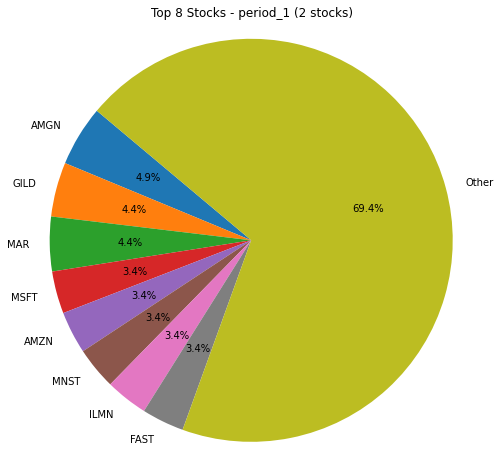

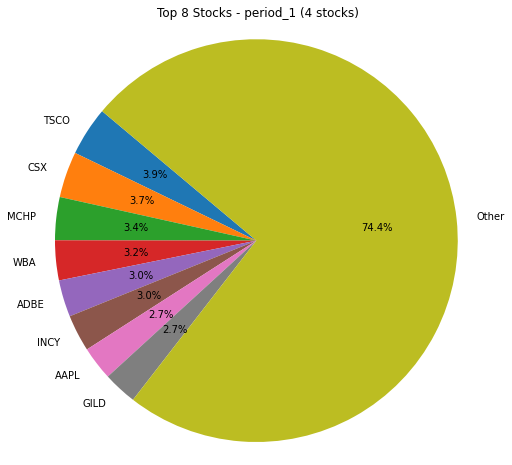

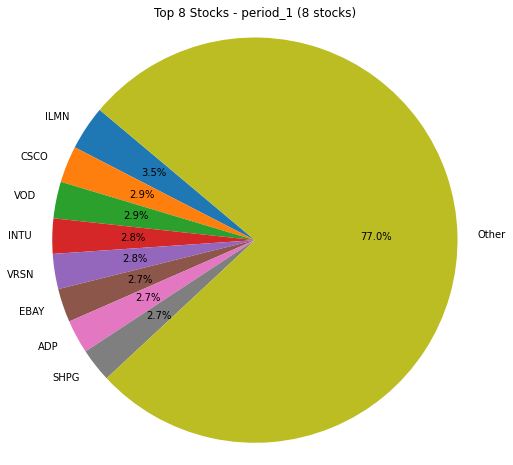

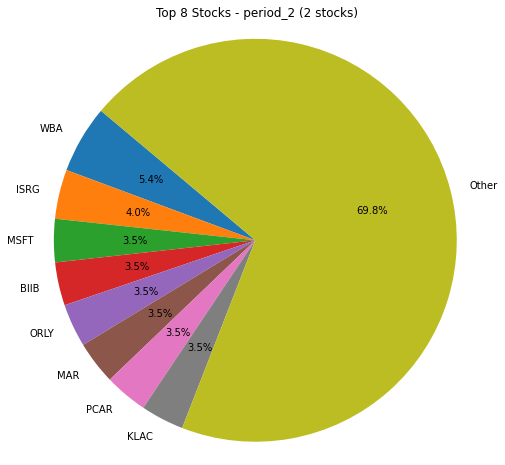

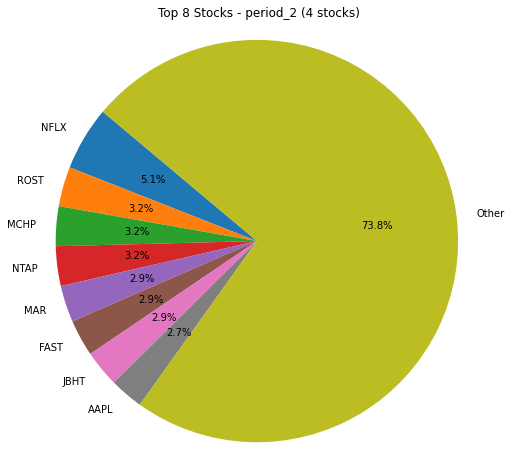

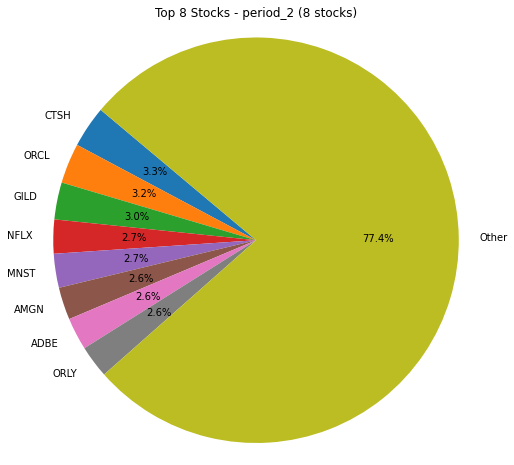

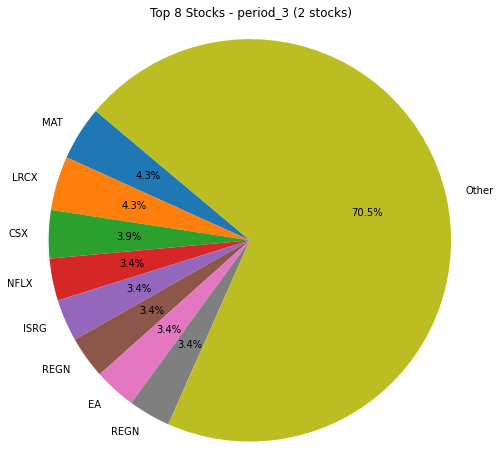

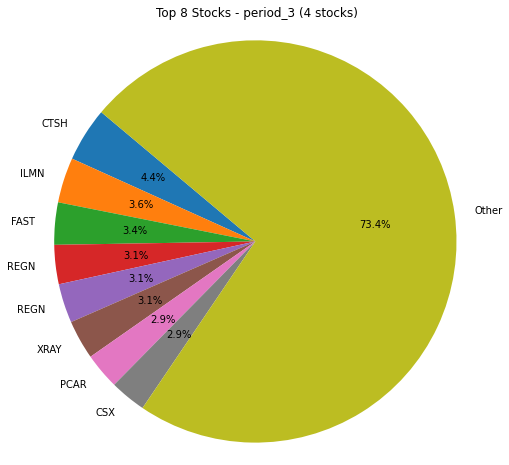

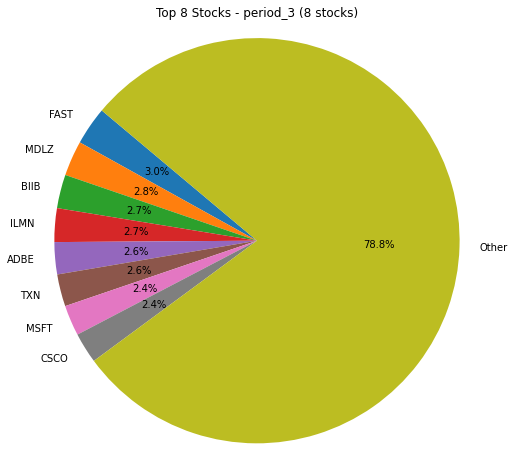

KeyboardInterrupt: 

In [8]:
for period, group in result_df_random.groupby(level=0):
    # Create an empty DataFrame to store counts for the current period
    counts_df = pd.DataFrame(index=custom_tickers, columns=[period])

    # Count occurrences of each ticker in the current period
    ticker_counts = pd.Series(group["Stocks"].sum()).value_counts()
    counts_df[period] = ticker_counts.reindex(custom_tickers, fill_value=0)

    # Sum the counts across tickers
    total_counts = counts_df.sum(axis=1)

    # Get the top 8 stocks and group the rest into "Other"
    top_8 = total_counts.nlargest(8)
    other = pd.Series(total_counts.sum() - top_8.sum(), index=["Other"])

    # Concatenate the top 8 and "Other"
    final_counts = pd.concat([top_8, other])

    # Plot the pie chart for the current period
    plt.figure(figsize=(8, 8))
    plt.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Top 8 Stocks - {period}')
    plt.show()

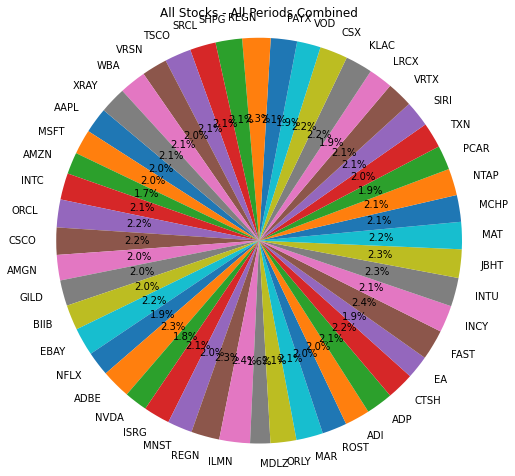

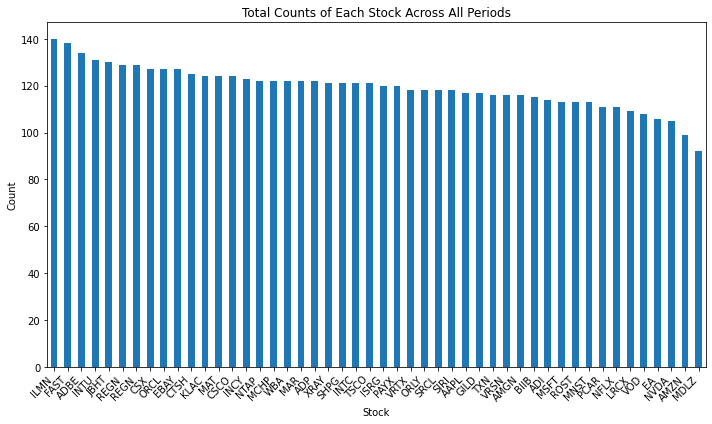

In [9]:
total_counts_df = pd.DataFrame(index=custom_tickers)

# Iterate over each period
for period, group in result_df_random.groupby(level=0):
    # Create an empty DataFrame to store counts for the current period
    counts_df = pd.DataFrame(index=custom_tickers)

    # Count occurrences of each ticker in the current period
    ticker_counts = pd.Series(group["Stocks"].sum()).value_counts()
    counts_df[period] = ticker_counts.reindex(custom_tickers, fill_value=0)

    # Sum the counts across tickers for the current period
    total_counts_df[period] = counts_df.sum(axis=1)

# Sum the counts across all periods
total_counts = total_counts_df.sum(axis=1)

# Plot the pie chart for all periods combined
plt.figure(figsize=(8, 8))
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('All Stocks - All Periods Combined')
plt.show()

total_counts_df = pd.DataFrame(index=custom_tickers)

# Iterate over each period
for period, group in result_df_random.groupby(level=0):
    # Create an empty DataFrame to store counts for the current period
    counts_df = pd.DataFrame(index=custom_tickers)

    # Count occurrences of each ticker in the current period
    ticker_counts = pd.Series(group["Stocks"].sum()).value_counts()
    counts_df[period] = ticker_counts.reindex(custom_tickers, fill_value=0)

    # Sum the counts across tickers for the current period
    total_counts_df[period] = counts_df.sum(axis=1)

# Sum the counts across all periods
total_counts = total_counts_df.sum(axis=1)

# Sort the total counts in descending order
total_counts_sorted = total_counts.sort_values(ascending=False)

# Plot the bar chart for all periods combined
plt.figure(figsize=(10, 6))
total_counts_sorted.plot(kind='bar')
plt.xlabel('Stock')
plt.ylabel('Count')
plt.title('Total Counts of Each Stock Across All Periods')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
#CLUSTERS

import pandas as pd
import numpy as np

def calculate_metrics_for_all_clusters(all_cluster_stocks, period_dfs):
    results_by_period = {}
    num_portfolios = 100
    
    for period, cluster_stocks in all_cluster_stocks.items():
        returns_data = period_dfs[period].droplevel(1, axis=1)
        results_by_cluster = {}
        selected_stocks_list = {}
        #print(returns_data)
        
        for num_clusters, clusters in cluster_stocks.items():
            cluster_lists = list(clusters.values())
            std_returns = []
            portfolio_returns = []
            #print(cluster_lists)
            correlations = []
            
            for _ in range(num_portfolios):
                # First, choose stocks from each cluster
                selected_stocks = [np.random.choice(cluster_list, size=1)[0] for cluster_list in cluster_lists]
                
                try:
                    selected_stocks_list[num_stocks] = np.concatenate([selected_stocks_list[num_stocks], selected_stocks])
                except KeyError:
                    selected_stocks_list[num_stocks] = selected_stocks
                
                portfolio_return_stocks = returns_data[selected_stocks].mean(axis=1)
                
                
                mean_portfolio_return = np.prod(1+portfolio_return_stocks)-1
                portfolio_returns.append(mean_portfolio_return)
                
                #print(returns_data[selected_stocks].std())
                mean_std = (portfolio_return_stocks+1).std()
                std_returns.append(mean_std)
                
                correlation_matrix = returns_data[selected_stocks].corr()
                upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
                upper_triangle_flat = upper_triangle.stack().dropna().tolist()
                mean_correlation = np.mean(upper_triangle_flat)
                correlations.append(mean_correlation)
            plt.show()
            
            sharpe_ratio = np.mean((np.array(portfolio_returns)/10) / np.array(std_returns))
            mean_return = np.mean(portfolio_returns)
            mean_std = np.mean(std_returns)
            mean_correl = np.mean(correlations)
            
            final_stocks_list = [list(i) for i in selected_stocks_list.values()]
            
            results_by_cluster[num_clusters] = {'Mean': mean_return, 'SD': mean_std, 'Sharpe': sharpe_ratio, 'Correlation': mean_correl, "Stocks" : final_stocks_list}
            #print()
        results_by_period[period] = results_by_cluster
    
    return results_by_period

#results_by_period = calculate_metrics_for_all_clusters(all_cluster_stocks, period_dfs)
#results_by_period


results_by_period = calculate_metrics_for_all_clusters(all_cluster_stocks, period_dfs)

dfs = []
for period, results_by_cluster in results_by_period.items():
    for num_clusters, metrics in results_by_cluster.items():
        df = pd.DataFrame(metrics, index=[f"{period} ({num_clusters} stocks)"])
        dfs.append(df)

result_df_clusters = pd.concat(dfs)
result_df_clusters

,Mean,SD,Sharpe,Correlation,Stocks
period_1 (2 stocks),0.717145,0.061781,1.256309,0.279477,"[CSX, ADI, ILMN, NVDA, PCAR, ORCL, VOD, ORCL, ..."
period_1 (4 stocks),0.728344,0.047763,1.563844,0.252480,"[CSX, ADI, ILMN, NVDA, PCAR, ORCL, VOD, ORCL, ..."
period_1 (8 stocks),0.755895,0.041332,1.850758,0.235977,"[CSX, ADI, ILMN, NVDA, PCAR, ORCL, VOD, ORCL, ..."
period_2 (2 stocks),0.743677,0.038346,1.711940,0.230316,"[BIIB, KLAC, INTU, MCHP, SHPG, VRSN, ISRG, VRS..."
period_2 (4 stocks),0.923318,0.030599,2.807053,0.194706,"[BIIB, KLAC, INTU, MCHP, SHPG, VRSN, ISRG, VRS..."
period_2 (8 stocks),1.053431,0.026564,3.817605,0.197593,"[BIIB, KLAC, INTU, MCHP, SHPG, VRSN, ISRG, VRS..."
period_3 (2 stocks),0.143243,0.046046,0.278763,0.403826,"[MSFT, JBHT, NTAP, ADBE, GILD, MCHP, MNST, LRC..."
period_3 (4 stocks),0.246866,0.041920,0.574570,0.363602,"[MSFT, JBHT, NTAP, ADBE, GILD, MCHP, MNST, LRC..."
period_3 (8 stocks),0.214179,0.037458,0.568070,0.335220,"[MSFT, JBHT, NTAP, ADBE, GILD, MCHP, MNST, LRC..."
period_4 (2 stocks),1.165986,0.036145,3.185923,0.261006,"[EBAY, REGN, MSFT, INCY, INTC, SIRI, PCAR, NFL..."


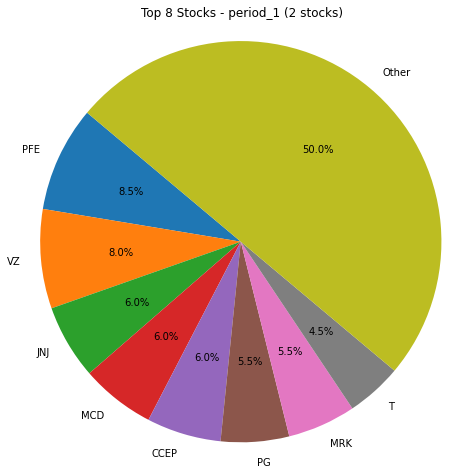

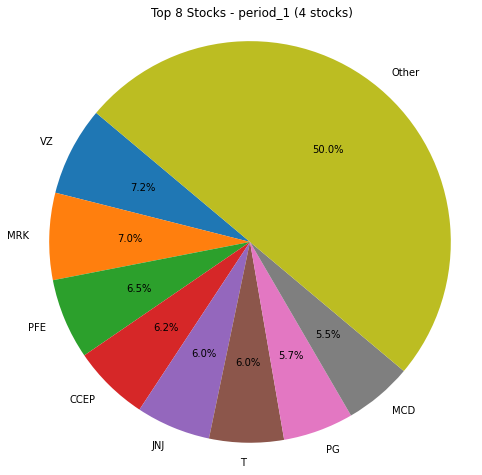

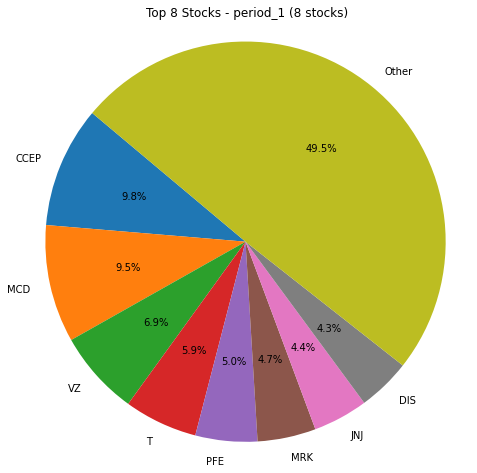

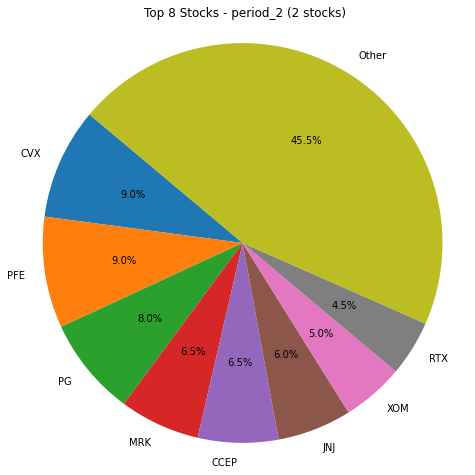

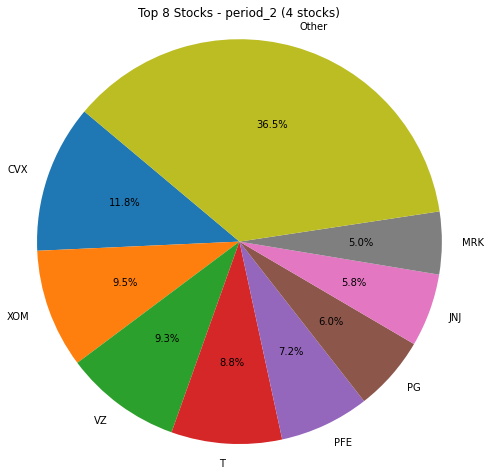

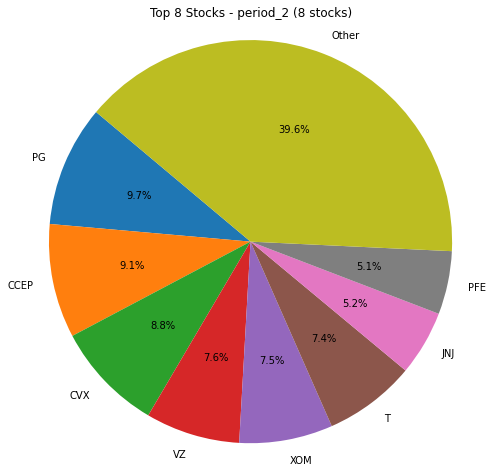

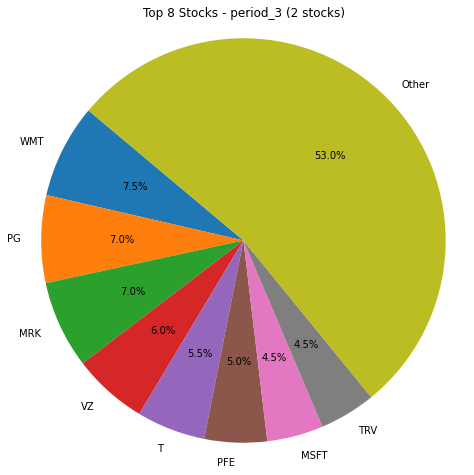

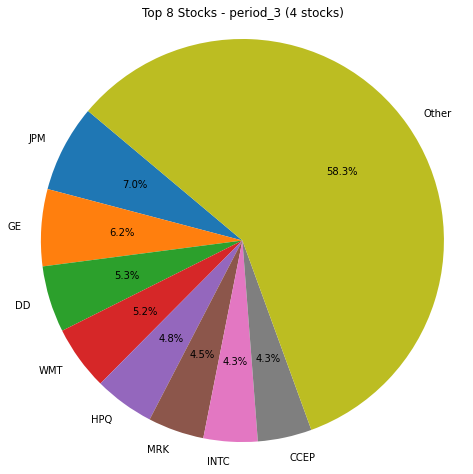

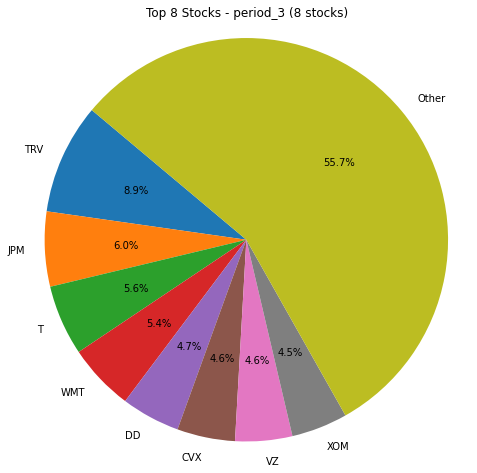

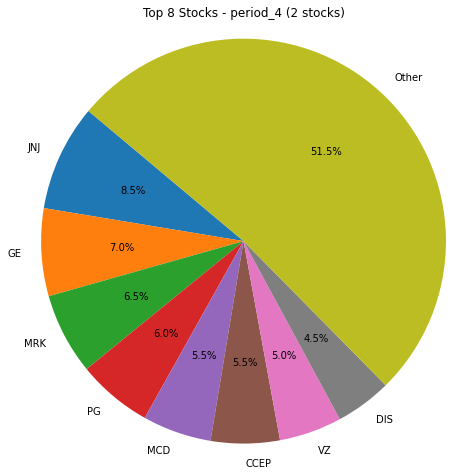

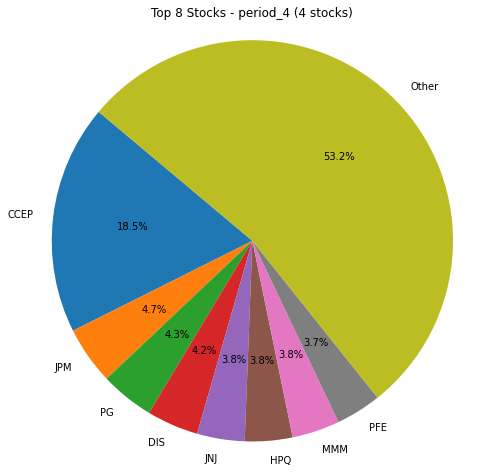

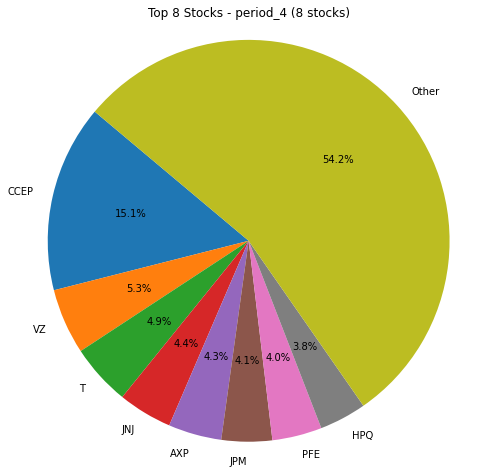

In [23]:
for period, group in result_df_clusters.groupby(level=0):
    # Create an empty DataFrame to store counts for the current period
    counts_df = pd.DataFrame(index=custom_tickers, columns=[period])

    # Count occurrences of each ticker in the current period
    ticker_counts = pd.Series(group["Stocks"].sum()).value_counts()
    counts_df[period] = ticker_counts.reindex(custom_tickers, fill_value=0)

    # Sum the counts across tickers
    total_counts = counts_df.sum(axis=1)

    # Get the top 8 stocks and group the rest into "Other"
    top_8 = total_counts.nlargest(8)
    other = pd.Series(total_counts.sum() - top_8.sum(), index=["Other"])

    # Concatenate the top 8 and "Other"
    final_counts = pd.concat([top_8, other])

    # Plot the pie chart for the current period
    plt.figure(figsize=(8, 8))
    plt.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Top 8 Stocks - {period}')
    plt.show()

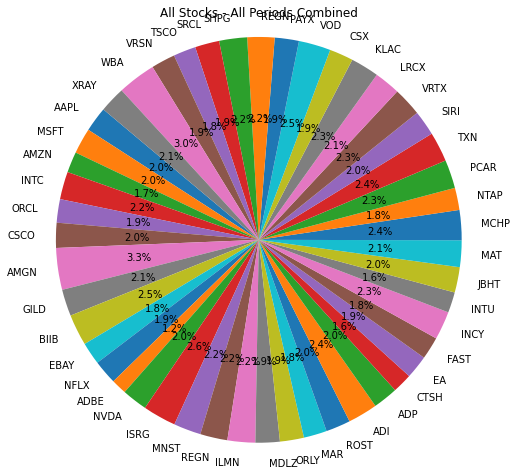

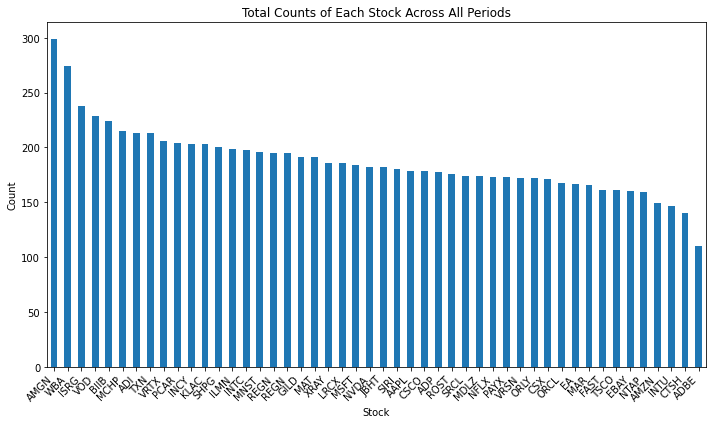

In [11]:
total_counts_df = pd.DataFrame(index=custom_tickers)

# Iterate over each period
for period, group in result_df_clusters.groupby(level=0):
    # Create an empty DataFrame to store counts for the current period
    counts_df = pd.DataFrame(index=custom_tickers)

    # Count occurrences of each ticker in the current period
    ticker_counts = pd.Series(group["Stocks"].sum()).value_counts()
    counts_df[period] = ticker_counts.reindex(custom_tickers, fill_value=0)

    # Sum the counts across tickers for the current period
    total_counts_df[period] = counts_df.sum(axis=1)

# Sum the counts across all periods
total_counts = total_counts_df.sum(axis=1)

# Plot the pie chart for all periods combined
plt.figure(figsize=(8, 8))
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('All Stocks - All Periods Combined')
plt.show()

total_counts_df = pd.DataFrame(index=custom_tickers)

# Iterate over each period
for period, group in result_df_clusters.groupby(level=0):
    # Create an empty DataFrame to store counts for the current period
    counts_df = pd.DataFrame(index=custom_tickers)

    # Count occurrences of each ticker in the current period
    ticker_counts = pd.Series(group["Stocks"].sum()).value_counts()
    counts_df[period] = ticker_counts.reindex(custom_tickers, fill_value=0)

    # Sum the counts across tickers for the current period
    total_counts_df[period] = counts_df.sum(axis=1)

# Sum the counts across all periods
total_counts = total_counts_df.sum(axis=1)

# Sort the total counts in descending order
total_counts_sorted = total_counts.sort_values(ascending=False)

# Plot the bar chart for all periods combined
plt.figure(figsize=(10, 6))
total_counts_sorted.plot(kind='bar')
plt.xlabel('Stock')
plt.ylabel('Count')
plt.title('Total Counts of Each Stock Across All Periods')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

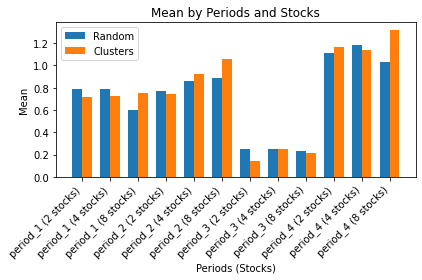

Total Average Mean of Random Values: 0.7280692403224834
Total Average Mean of Cluster Values: 0.7625143630443132

Period 1 Average Mean of Random Values: 0.7238845926507264
Period 1 Average Mean of Cluster Values: 0.733794415437166
Period 2 Average Mean of Random Values: 0.838735607576627
Period 2 Average Mean of Cluster Values: 0.906808905767687
Period 3 Average Mean of Random Values: 0.2434583675990012
Period 3 Average Mean of Cluster Values: 0.201429285444223


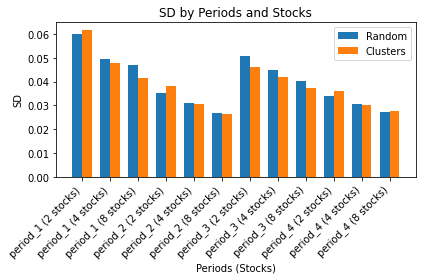

Total Average SD of Random Values: 0.03973989459605253
Total Average SD of Cluster Values: 0.038826023933602884

Period 1 Average SD of Random Values: 0.05212048137673412
Period 1 Average SD of Cluster Values: 0.05029208166206097
Period 2 Average SD of Random Values: 0.031089492264732763
Period 2 Average SD of Cluster Values: 0.03183621576083236
Period 3 Average SD of Random Values: 0.045294080109925104
Period 3 Average SD of Cluster Values: 0.04180791883173022


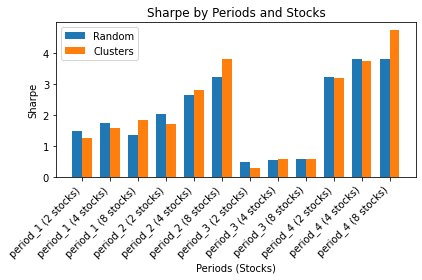

Total Average Sharpe of Random Values: 2.073145617867358
Total Average Sharpe of Cluster Values: 2.176130729798846

Period 1 Average Sharpe of Random Values: 1.5182561129090921
Period 1 Average Sharpe of Cluster Values: 1.5569703710818377
Period 2 Average Sharpe of Random Values: 2.6278133389626905
Period 2 Average Sharpe of Cluster Values: 2.778865970782496
Period 3 Average Sharpe of Random Values: 0.537193494206227
Period 3 Average Sharpe of Cluster Values: 0.4738009520426963


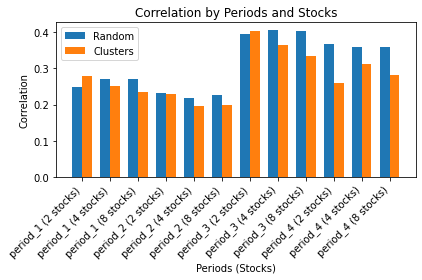

Total Average Correlation of Random Values: 0.3135981065312116
Total Average Correlation of Cluster Values: 0.27906315570793344

Period 1 Average Correlation of Random Values: 0.2637991986702111
Period 1 Average Correlation of Cluster Values: 0.25597800929378234
Period 2 Average Correlation of Random Values: 0.22605224777658597
Period 2 Average Correlation of Cluster Values: 0.2075383531748771
Period 3 Average Correlation of Random Values: 0.4019344008540762
Period 3 Average Correlation of Cluster Values: 0.3675494267477728


In [12]:
def plot_metric(metric_name):
    labels = list(result_df_random.index)
    
    random_values = [result_df_random.loc[label][metric_name] for label in labels]
    cluster_values = [result_df_clusters.loc[label][metric_name] for label in labels]

    x = range(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, random_values, width, label='Random')
    rects2 = ax.bar([i + width for i in x], cluster_values, width, label='Clusters')

    ax.set_xlabel('Periods (Stocks)')
    ax.set_ylabel(metric_name)
    ax.set_title(f'{metric_name} by Periods and Stocks')
    ax.set_xticks([i + width/2 for i in x])
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.legend()

    fig.tight_layout()

    plt.show()

    #print(random_values)
    #print(cluster_values)
    
    print("Total Average " + metric_name + " of Random Values:", np.mean(random_values))
    print("Total Average " + metric_name + " of Cluster Values:", np.mean(cluster_values))
    print()
    periods = ["Period 1", "Period 2", "Period 3"]  # Update with your periods
    for period_num, period_label in enumerate(periods, start=1):
        print(period_label + " Average " + metric_name + " of Random Values:", np.mean(random_values[(period_num - 1) * 3:period_num * 3]))
        print(period_label + " Average " + metric_name + " of Cluster Values:", np.mean(cluster_values[(period_num - 1) * 3:period_num * 3]))

# Plotting Mean
plot_metric('Mean')

# Plotting SD
plot_metric('SD')

# Plotting Sharpe
plot_metric('Sharpe')

# Plotting Correlation
plot_metric('Correlation')